### 2.1 Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

In [1]:
# Import the pandas, NumPy, Matplotlib,Seaborn and os libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path into a string 
path= r'C:\Users\Carolina\Documents\CareerFoundry\Data Immersion\Achivement 4-Python\Instacart Basket Analysis'

In [4]:
# Import the “ords_prods_merge.pkl” file into Jupyter as ords_prods_merge
ords_prods_cus_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cus_merge.pkl'))

SystemError: deallocated bytearray object has exported buffers

MemoryError: 

### 2.2 If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

In [6]:
# Check for the exact names of the columns 
ords_prods_cus_merge.columns

Index(['Unnamed: 0_x', 'order_id', 'user_id', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', '_merge', 'Unnamed: 0_y',
       'product_name', 'aisle_id', 'department_id', 'prices', 'Checked',
       'price_range_loc', 'busiest_day', 'Busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spending', 'spending_flag', 'median_dspo', 'frequency_flag',
       'first_name', 'last_name', 'Gender', 'state', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'Check'],
      dtype='object')

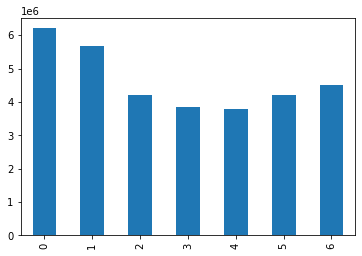

In [40]:
#Create a bar chart of the order of the week
bar=ords_prods_cus_merge['order_dow'].value_counts().sort_index().plot.bar()

In [41]:
# Save visualization
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

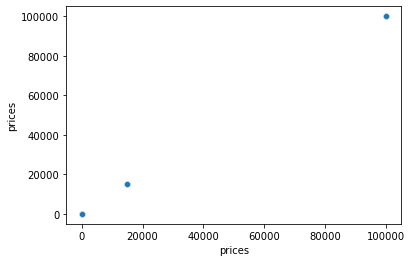

In [10]:
# Create the scattered plot of the prices variable to identify outliers
scatter= sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_cus_merge)

In [11]:
# Determine the amount of outliers by setting prices higher than $100 
ords_prods_cus_merge.loc[ords_prods_cus_merge['prices'] > 100]

Unnamed: 0_x  order_id user_id  order_number  order_dow  \
7805             24261   1435153    1519            26          2   
7806             24267   1066435    1519            32          3   
15143            39073   1697208    2409            33          1   
20264            57126    965345    3531            27          2   
20497            61481   2943740    3793             1          2   
...                ...       ...     ...           ...        ...   
32303799        854612   3265389   51346             4          1   
32307882       2186800   1179092  131671            12          4   
32310810        658416   1226705   39667             7          2   
32330048       1583942   3000037   95105             2          4   
32330049       1583944   2741225   95105             4          5   

          order_hour_of_day  days_since_prior_order  product_id  \
7805                     11                     6.0       21553   
7806                     10                     5.0       21553   
15143                    19                     5.0       21553   
20264                    19                     8.0       33664   
20497                     9                     NaN       21553   
...                     ...                     ...         ...   
32303799                 17                    13.0       33664   
32307882                  9                    15.0       33664   
32310810                 15                    20.0       33664   
32330048                 19                    22.0       33664   
32330049                 12                     2.0       33664   

          add_to_cart_order  reordered  ... first_name  last_name  Gender  \
7805                     15          0  ...      Craig      Clark    Male   
7806                     28          1  ...      Craig      Clark    Male   
15143                     1          0  ...     Nicole   Odonnell  Female   
20264                     2          0  ...      Alice    Compton  Female   
20497                     3          0  ...      Jerry      Allen    Male   
...                     ...        ...  ...        ...        ...     ...   
32303799                  2          1  ...        NaN      Gould    Male   
32307882                  1          0  ...      Diana     Hansen  Female   
32310810                 14          0  ...     Johnny      Colon    Male   
32330048                  4          0  ...  Catherine   Browning  Female   
32330049                  3          1  ...  Catherine   Browning  Female   

                   state  Age  date_joined n_dependants        fam_status  \
7805        Rhode Island   68   2020-03-04            0  divorced/widowed   
7806        Rhode Island   68   2020-03-04            0  divorced/widowed   
15143             Hawaii   55   2018-11-11            2           married   
20264             Hawaii   80   2019-10-06            2           married   
20497          Louisiana   59   2019-08-23            3           married   
...                  ...  ...          ...          ...               ...   
32303799    Rhode Island   58   2019-01-25            1           married   
32307882    Rhode Island   35   2018-08-04            0            single   
32310810    Rhode Island   78   2019-05-08            2           married   
32330048  South Carolina   48   2017-01-18            2           married   
32330049  South Carolina   48   2017-01-18            2           married   

          income Check  
7805      177864  both  
7806      177864  both  
15143     230074  both  
20264     233776  both  
20497     182933  both  
...          ...   ...  
32303799  207497  both  
32307882   86490  both  
32310810  195077  both  
32330048  398880  both  
32330049  398880  both  

[5127 rows x 37 columns]

In [13]:
# Assign these outliers as missing values by using the function np.nan
ords_prods_cus_merge.loc[ords_prods_cus_merge['prices'] >100, 'prices'] = np.nan

In [14]:
# Check the maximum value for the prices column
ords_prods_cus_merge['prices'].max()

25.0

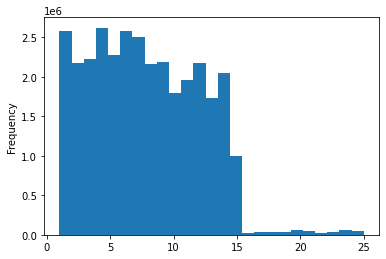

In [42]:
# Now we are ready to plot the histogram of the prices variable
hist=ords_prods_cus_merge['prices'].plot.hist(bins = 25)

In [43]:
# Save visualization
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

<AxesSubplot:ylabel='Frequency'>

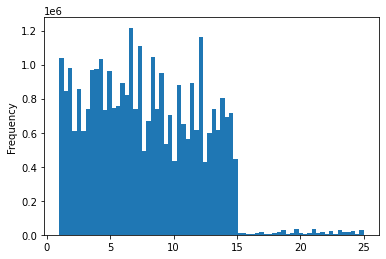

In [17]:
# Increase the granularity by increasing the number of bins
ords_prods_cus_merge['prices'].plot.hist(bins = 70)

In [18]:
# For creating the line chart set the seed for the random number generator
# Second, Create the random numbers (the length of your ords_prods_cus_merge dataframe) ranging between 0 and 1
# Third, make a logical test to see if those numbers are equal or less than 0.7 
# Finally, store the boolean results in a list call dev 
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cus_merge)) <= 0.7

In [20]:
# Split the dataframe into two samples (a big one and a small one) 
big = ords_prods_cus_merge[dev]
small = ords_prods_cus_merge[~dev]

In [23]:
# Check if the sum of the two samples is the total number of rows of the dataframe 
len(ords_prods_cus_merge)

32404859

In [22]:
len(big) + len(small)

32404859

In [24]:
# Use only the columns that will be included in the line chart
df_2 = small[['order_dow','prices']]

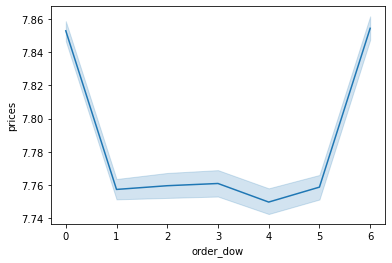

In [25]:
# Create the linechart 
line = sns.lineplot(data = df_2, x = 'order_dow',y = 'prices')

In [44]:
# Save visualization
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_dow_prices.png'))

### 2.3 You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. In a markdown cell beneath your histogram, describe what the histogram demonstrates.

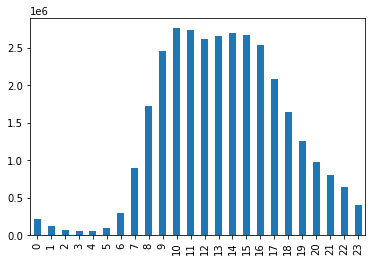

In [45]:
# I will create a bar char instead of an histogram because order_hour_of_day is not a continous variable
hist2= ords_prods_cus_merge['order_hour_of_day'].value_counts().sort_index().plot.bar()

The histogram shows how most of the orders follow almost like a normal distribution skewed to the left. Most of the orders concentrate between 9am and 4pm.

In [46]:
# Save visualization
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_day.png'))

### 2.4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

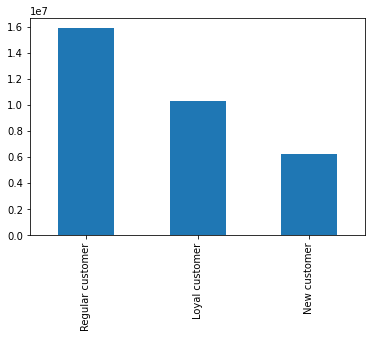

In [47]:
bar2= ords_prods_cus_merge['loyalty_flag'].value_counts().plot.bar()

In [48]:
# Save visualization
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'))

### 2.5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [30]:
# Since the small sample had been already created, for this exercise, I will use it to create a df with the relevant columns
df_3 = small[['order_hour_of_day','prices']]

In [49]:
# Create the linechart 
line2 = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

There is a difference and one can see that there is a low peak at 10am and a high peak at the hours preceding 5am. However, the range of the prices displayed by this sample is less than one dollar(7.9-7.725), so in overall terms there is not a remarkable difference.  

In [50]:
# Save visualization
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hourday_prices.png'))

### 2.6 Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family status by creating a line chart exploring the connections between age and number of dependents: In a markdown cell beneath your line chart, describe what the line chart shows.

In [32]:
# Since the small sample had been already created, for this exercise, I will use it to create a df with the relevant columns
df_4 = small[['n_dependants','Age']]

In [34]:
ords_prods_cus_merge['Age'].dtype

dtype('int64')

In [36]:
ords_prods_cus_merge['n_dependants'].dtype

dtype('int64')

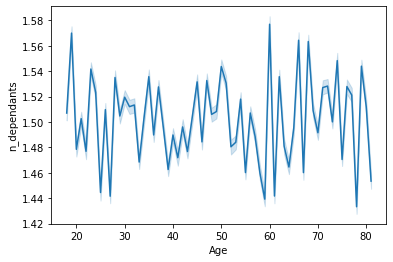

In [37]:
# Create the linechart 
line3 = sns.lineplot(data = df_4, x ='Age',y = 'n_dependants')

The line chart above does not show a pattern. In general it would be expected that between the ages of 25 and 60 the number of dependants will be much higher than the extremes (below 25 and above 70 years old). In fact, it is hard to interpret why there is a high peak for ages below 20 years old. So in clonclusion there it is hard to say there is a connection between these two variables. 

In [51]:
# Save visualization
line3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

### 2.7 You’ll also need to explore whether there’s a connection between age and spending power. To visualize this relationship, create a scatterplot using the sns.scatterplot() function. In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

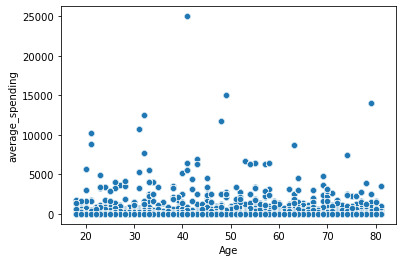

In [39]:
# Create the scattered plot of the average spending and age
scatter= sns.scatterplot(x = 'Age', y = 'average_spending',data = ords_prods_cus_merge)

Most of the average spending for any ages is concentrated below 5000. $25,000 is the biggest outilier coming from customer(s) at their early 40s. Overall, there is no strong correlation between spending power and age.    

In [52]:
# Save visualization
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_averagespending_age.png'))

In [ ]:
sns.